<a href="https://colab.research.google.com/github/HuynhPhamNhatNam/DataAnalystAndDeepLearning/blob/main/Labs/Lab05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ví dụ**

---



# **Mean - Mode - Median**



**Thí dụ 1:**

In [1]:
from scipy import stats
speed = [99, 86, 87, 88, 111, 86, 103, 87, 94, 78, 77, 85, 86]
mode = stats.mode(speed)

print(mode)

ModeResult(mode=array([86]), count=array([3]))


**Median** - The median value is the value in the middle, after you have sorted all the values: 77, 78, 85, 86, 86, 86, 87, 87, 88, 94, 99, 103, 111

**Thí dụ 2:**

In [2]:
import numpy

speed = [99, 86, 87, 88, 111, 86, 103, 87, 94, 78, 77, 85, 86]

median = numpy.median(speed)

print(median)

87.0


**Mean**
The mean value is the average value. To calculate the mean, find the sum of all values, and divide the sum by the number of values: (99+86+87+88+111+86+103+87+94+78+77+85+86) / 13 = 89.77

**Thí dụ 3:**

In [3]:
import numpy

speed = [99, 86, 87, 88, 111, 86, 103, 87, 94, 78, 77, 85, 86]

mean = numpy.mean(speed)

print(mean)

89.76923076923077


**Nhận xét:**
1. Mean = Median = Mode ==> Tập dữ liệu có hình dạng phân phối chuẩn (symmetrical distribution)
2. Mode > Median > Mean ==> Dạng phân phối theo khuynh hướng Negative (Left-Skewed)
3. Mean > Median > Mode ==> Dạng phân phối theo khuynh hướng Positive (Right-Skewed)

**Thí dụ 4:** Dùng đồ thị Histogram, đồ thị boxplot và các độ đo thống kê để khảo sát hình dạng phân phối

In [4]:
import pandas as pd
dulieuxettuyen = pd.read_csv("https://raw.githubusercontent.com/huynhhoc/DataAnalystDeepLearning/main/Data/dulieuxettuyendaihoc.csv")

In [5]:
import seaborn as sns


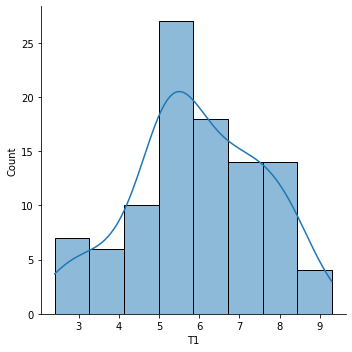

In [7]:
sns.displot(dulieuxettuyen, x="T1", kde=True)

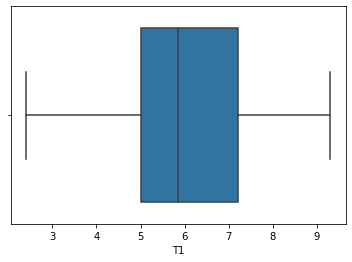

In [6]:
sns.boxplot(x='T1', data = dulieuxettuyen)


Dựa vào histogram ta có thể thấy hình dạng phân phối của T1 có dạng xấp xỉ đối xứng, nhưng đồ thị boxplot ta lại thấy phân phối của T1 hơi lệch trái. Ta dùng thêm các đặc trưng số của T1 để có thêm thông tin



In [8]:
mean = dulieuxettuyen['T1'].mean()
mode = dulieuxettuyen['T1'].mode()
median = dulieuxettuyen['T1'].median()

In [9]:
print ('mean= ', mean)
print ('median= ', median)

mean=  5.946000000000001
median=  5.85


In [10]:
print ('mode = ', mode)


mode=  0    5.2
1    5.3
2    7.3
dtype: float64


Giá trị mode chỉ là 5.2; 5.3; 7.3. Biến T1 là biến ngẫu nhiên nhận các giá trị liên tục, nên Mode ở đây được hiểu là khoảng chứa dữ liệu nhiều nhất, cụ thể mode ở đây phải thuộc khoảng từ 5.2 đến 7.3. Cho nên ta vẫn có thể dựa vào Mean, Media để đưa ra kết luận là hình dáng phân phối của biến T1.

Ta thấy **Mean > Median** nên hình dáng phân phối của T1 là lệch phải

# **Skewness và Kurtosis**


**Skewness:** "Skewness assesses the extent to which a variable’s distribution is symmetrical. If the distribution of responses for a variable stretches toward the right or left tail of the distribution, then the distribution is referred to as skewed (Hair et al., 2017, p. 61).

*Skewness đánh giá mức độ mà phân phối của một biến là đối xứng. Nếu phân phối các phản hồi cho một biến số trải dài về phía đuôi bên phải hoặc bên trái của phân phối, thì phân phối được gọi là lệch (Hair và cộng sự, 2017, trang 61).*



**Kurtosis** is a measure of whether the distribution is too peaked (a very narrow distribution with most of the responses in the center)." (Hair et al., 2017, p. 61).

*Kurtosis là thước đo liệu phân bố có quá đỉnh hay không (phân bố rất hẹp với hầu hết các phản hồi ở trung tâm). "(Hair và cộng sự, 2017, trang 61).*

In [11]:
from scipy.stats import skew
skew(dulieuxettuyen['T1'], bias=False)

-0.17824317486762223

In [12]:
from scipy.stats import kurtosis
kurtosis(dulieuxettuyen['T1'], bias=False)

-0.48010360836580546

# **Thực hành**
---



**1. Mô tả dữ liệu bằng các giá trị số**



Bước 1: Tính các đại lượng thống kê cho hai tập dữ liệu



In [13]:
import pandas as pd
dulieu = pd.read_csv('https://raw.githubusercontent.com/huynhhoc/DataAnalystDeepLearning/main/Data/babies.csv', sep='\s+')
dulieu

,bwt,smoke
0,120,0
1,113,0
2,128,1
3,123,0
4,108,1
...,...,...
1231,113,0
1232,128,0
1233,130,1
1234,125,0


In [14]:
dl1 = pd.DataFrame(dulieu)
dlhutthuoc = dl1[dl1['smoke'] == 1]
dlkohutthuoc = dl1[dl1['smoke'] == 0]

In [15]:
d = {'TH1: Bà mẹ hút thuốc' : pd.Series([dlhutthuoc['bwt'].count(),dlhutthuoc['bwt'].min(),
                      dlhutthuoc['bwt'].max(),dlhutthuoc['bwt'].mean(),
                      dlhutthuoc['bwt'].std(),dlhutthuoc['bwt'].var(),
                      dlhutthuoc['bwt'].median(),dlhutthuoc['bwt'].quantile(.0),
                      dlhutthuoc['bwt'].quantile(.25),dlhutthuoc['bwt'].quantile(.5),
                      dlhutthuoc['bwt'].quantile(.75),dlhutthuoc['bwt'].quantile(1),
                      dlhutthuoc['bwt'].quantile(.75)-dlhutthuoc['bwt'].quantile(.25),
                      dlhutthuoc['bwt'].kurtosis()+2.98,dlhutthuoc['bwt'].skew()],
                      index=['Số lượng', 'Min', 'Max', 'Mean', 'Sd', 'Var', 'Median', 'Quantile 0%',
                             'Quantile 25%', 'Quantile 50%', 'Quantile 75%', 'Quantile 100%', 'IQR',
                             'Kurtosis', 'Skewness']),
     'TH2: Bà mẹ không hút thuốc' : pd.Series([dlkohutthuoc['bwt'].count(),dlkohutthuoc['bwt'].min(),
                      dlkohutthuoc['bwt'].max(),dlkohutthuoc['bwt'].mean(),
                      dlkohutthuoc['bwt'].std(),dlkohutthuoc['bwt'].var(),
                      dlkohutthuoc['bwt'].median(),dlkohutthuoc['bwt'].quantile(.0),
                      dlkohutthuoc['bwt'].quantile(.25),dlkohutthuoc['bwt'].quantile(.5),
                      dlkohutthuoc['bwt'].quantile(.75),dlkohutthuoc['bwt'].quantile(1),
                      dlkohutthuoc['bwt'].quantile(.75)-dlkohutthuoc['bwt'].quantile(.25),
                      dlkohutthuoc['bwt'].kurtosis()+2.98,dlkohutthuoc['bwt'].skew()],
                      index=['Số lượng', 'Min', 'Max', 'Mean', 'Sd', 'Var', 'Median', 'Quantile 0%',
                             'Quantile 25%', 'Quantile 50%', 'Quantile 75%', 'Quantile 100%', 'IQR',
                             'Kurtosis', 'Skewness'])}

In [16]:
dt = pd.DataFrame(d)
dt

,TH1: Bà mẹ hút thuốc,TH2: Bà mẹ không hút thuốc
Số lượng,484.000000,742.000000
Min,58.000000,55.000000
Max,163.000000,176.000000
Mean,114.109504,123.047170
Sd,18.098946,17.398689
Var,327.571835,302.714371
Median,115.000000,123.000000
Quantile 0%,58.000000,55.000000
Quantile 25%,102.000000,113.000000
Quantile 50%,115.000000,123.000000


Bước 2: Phân tích dữ liệu dựa trên các đại lượng vừa tính



In [17]:
d1 =pd.DataFrame({'TH1: Bà mẹ hút thuốc' : pd.Series([dlhutthuoc['bwt'].std(skipna=True),dlhutthuoc['bwt'].var(skipna=True),
                                         dlhutthuoc['bwt'].max()-dlhutthuoc['bwt'].min(),
                                         dlhutthuoc['bwt'].quantile(.75)-dlhutthuoc['bwt'].quantile(.25)],
                                         index=['Sd', 'Var', 'Range', 'IQR']),
      'TH2: Bà mẹ không hút thuốc' : pd.Series([dlkohutthuoc['bwt'].std(skipna=True),dlkohutthuoc['bwt'].var(skipna=True),
                                         dlkohutthuoc['bwt'].max()-dlkohutthuoc['bwt'].min(),
                                         dlkohutthuoc['bwt'].quantile(.75)-dlkohutthuoc['bwt'].quantile(.25)],
                                         index=['Sd', 'Var', 'Range', 'IQR'])})
d1['Chênh lệch (TH2-TH1)'] = d1['TH2: Bà mẹ không hút thuốc']-d1['TH1: Bà mẹ hút thuốc']
d1

,TH1: Bà mẹ hút thuốc,TH2: Bà mẹ không hút thuốc,Chênh lệch (TH2-TH1)
Sd,18.098946,17.398689,-0.700257
Var,327.571835,302.714371,-24.857464
Range,105.000000,121.000000,16.000000
IQR,24.000000,21.000000,-3.000000


In [18]:
d2 = pd.DataFrame({'TH1: Bà mẹ hút thuốc' : pd.Series([dlhutthuoc['bwt'].skew(), dlhutthuoc['bwt'].kurtosis() + 2.98],
                   index = ['Skewness', 'Kurtosis']),
                   'TH2: Bà mẹ không hút thuốc' : pd.Series([dlkohutthuoc['bwt'].skew(), dlkohutthuoc['bwt'].kurtosis() + 2.98],
                   index = ['Skewness', 'Kurtosis'])})
d2['Chênh lệch (TH2-TH1)'] = d2['TH2: Bà mẹ không hút thuốc'] - d2['TH1: Bà mẹ hút thuốc']
d2

,TH1: Bà mẹ hút thuốc,TH2: Bà mẹ không hút thuốc,Chênh lệch (TH2-TH1)
Skewness,-0.033700,-0.187363,-0.153664
Kurtosis,2.980408,4.032213,1.051805


**Nhận xét:** trường hợp bà mẹ hút thuốc có phân bố dữ liệu nhọn hơn, đối xứng hơn so với trường hợp không hút thuốc. Cả 2 trường hợp đều hơi lệch về trái.



**2. Biểu diễn hình học của dữ liệu**



**2-1. Dữ liệu cân nặng của trẻ trong trường hợp bà mẹ hút thuốc và bà mẹ không hút thuốc**

Histogram trong trường hợp bà mẹ không hút thuốc



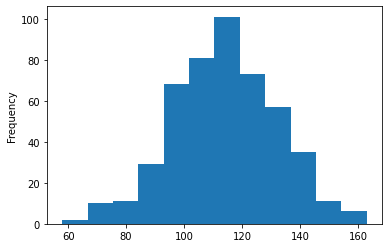

In [19]:
dlhutthuoc['bwt'].plot.hist(bins=12)


Boxplot

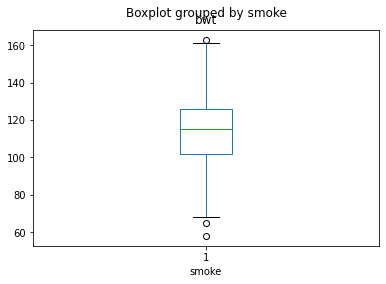

In [20]:
dlhutthuoc.boxplot(column = ['bwt'], by = 'smoke', grid = False)


**2-2. Dữ liệu cân nặng của trẻ trong trường hợp bà mẹ hút thuốc không hút thuốc**

Histogram trong trường hợp bà mẹ không hút thuốc

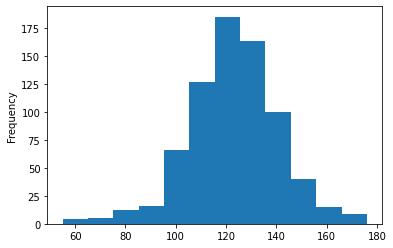

In [21]:
dlkohutthuoc['bwt'].plot.hist(bins=12)


Boxplot

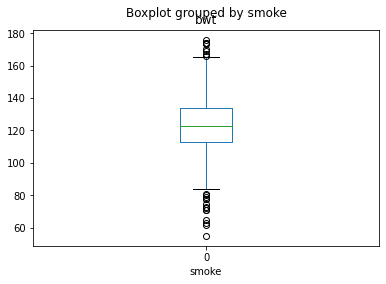

In [22]:
dlkohutthuoc.boxplot(column = ['bwt'], by = 'smoke', grid = False)
